In [ ]:

%reload_ext tensorboard
%tensorboard --logdir "ifcm/logs" --port 8010

In [ ]:
from tensorboard import notebook
notebook.list() # View open TensorBoard instances

In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.metrics import roc_curve, roc_auc_score, auc
import matplotlib.gridspec as gridspec
import os
from scipy import interp

In [10]:
folder_name="orijinal"
_lw=1.3

In [2]:
def subplots_centered(nrows, ncols, figsize, nfigs):
    """
    Modification of matplotlib plt.subplots(),
    useful when some subplots are empty.
    
    It returns a grid where the plots
    in the **last** row are centered.
    
    Inputs
    ------
        nrows, ncols, figsize: same as plt.subplots()
        nfigs: real number of figures
    """
    assert nfigs < nrows * ncols, "No empty subplots, use normal plt.subplots() instead"
    
    fig = plt.figure(figsize=figsize)
    axs = []
    
    m = nfigs % ncols
    m = range(1, ncols+1)[-m]  # subdivision of columns
    gs = gridspec.GridSpec(nrows, m*ncols)

    for i in range(0, nfigs):
        row = i // ncols
        col = i % ncols

        if row == nrows-1: # center only last row
            off = int(m * (ncols - nfigs % ncols) / 2)
        else:
            off = 0

        ax = plt.subplot(gs[row, m*col + off : m*(col+1) + off])
        axs.append(ax)
        
    return fig, axs

Epoch & Accuracy-Loss Curve

In [ ]:
fold_train_acc=[]
fold_val_acc=[]
fold_train_loss=[]
fold_val_loss=[]
fig, axs=subplots_centered(3,2, figsize=(12,12), nfigs=5)
for i in range(0,5):
    fold_train_acc.append(pd.read_csv(folder_name+"/epoch_acc/run-log_"+str(i+1)+"_train-tag-epoch_acc.csv"))
    fold_val_acc.append(pd.read_csv(folder_name+"/epoch_acc/run-log_"+str(i+1)+"_validation-tag-epoch_acc.csv"))
    fold_train_loss.append(pd.read_csv(folder_name+"/epoch_loss/run-log_"+str(i+1)+"_train-tag-epoch_loss.csv"))
    fold_val_loss.append(pd.read_csv(folder_name+"/epoch_loss/run-log_"+str(i+1)+"_validation-tag-epoch_loss.csv"))

for i in range(0,5):
    axs[i].plot(range(0,350), fold_train_acc[i].Value[0:350], lw=_lw)  
    axs[i].plot(range(0,350), fold_val_acc[i].Value[0:350], lw=_lw)
    axs[i].plot(range(0,350), fold_train_loss[i].Value[0:350]/5.8, lw=_lw)  
    axs[i].plot(range(0,350), fold_val_loss[i].Value[0:350]/5.8, lw=_lw)        


for idx,ax in enumerate(axs):
    ax.set(xlabel='Epoch', ylabel='Loss      -      Accuracy')
    ax.legend(["Train Accuracy","Validation Accuracy", "Train Loss","Validation Loss"], frameon=True, facecolor="white", loc="center right").get_frame().set_alpha(None)
    # ax.set_title("Fold "+str(idx+1))
    ax.set_xlim(0,350)
    ax.grid(True)
plt.tight_layout()
fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.35)
plt.savefig('EpochAccLoss',dpi=120)


ROC Curve

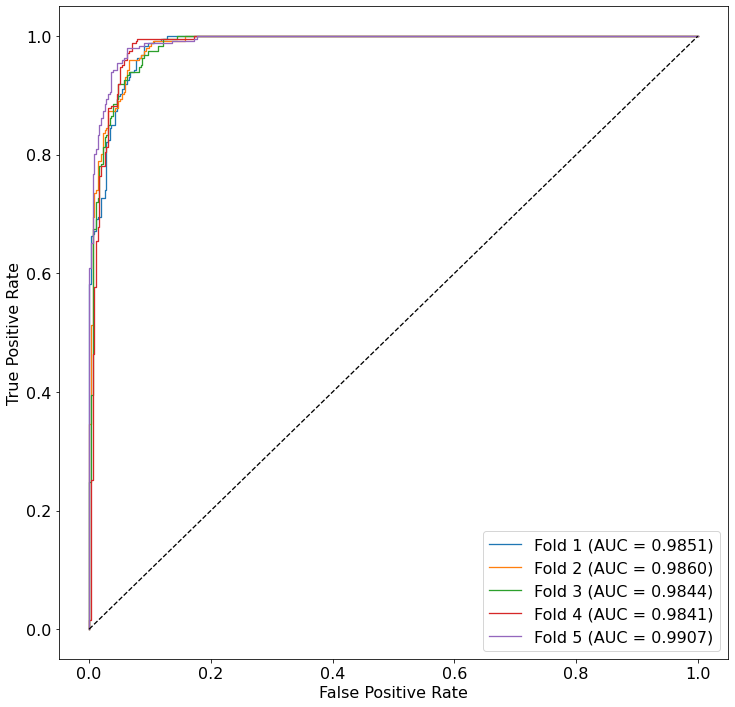

In [13]:
tprs=[]
fprs=[]
aucs=[]
mean_fpr=np.linspace(0,1,100)
tprs2=[]

plt.figure(figsize=(12,12))
plt.rcParams.update({'font.size': 16})
for file in os.listdir(folder_name+"/roc/")[0:5]:
    fprs.append(np.load(folder_name+"/roc/"+file))

for file in os.listdir(folder_name+"/roc/")[5:10]:
    tprs.append(np.load(folder_name+"/roc/"+file))

for i in range(0,5):
    roc_auc = auc(fprs[i], tprs[i])
    aucs.append(roc_auc)
    plt.plot(fprs[i],tprs[i], lw=_lw,  label='Fold %d (AUC = %0.4f)' % (i+1, aucs[i]))

plt.plot([0,1],[0,1],linestyle= '--',lw = _lw,color = 'black')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.savefig('ROC',dpi=300)